<a href="https://colab.research.google.com/github/Succzzz33/QM_2023/blob/main/%E6%B5%8B%E8%AF%95qm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

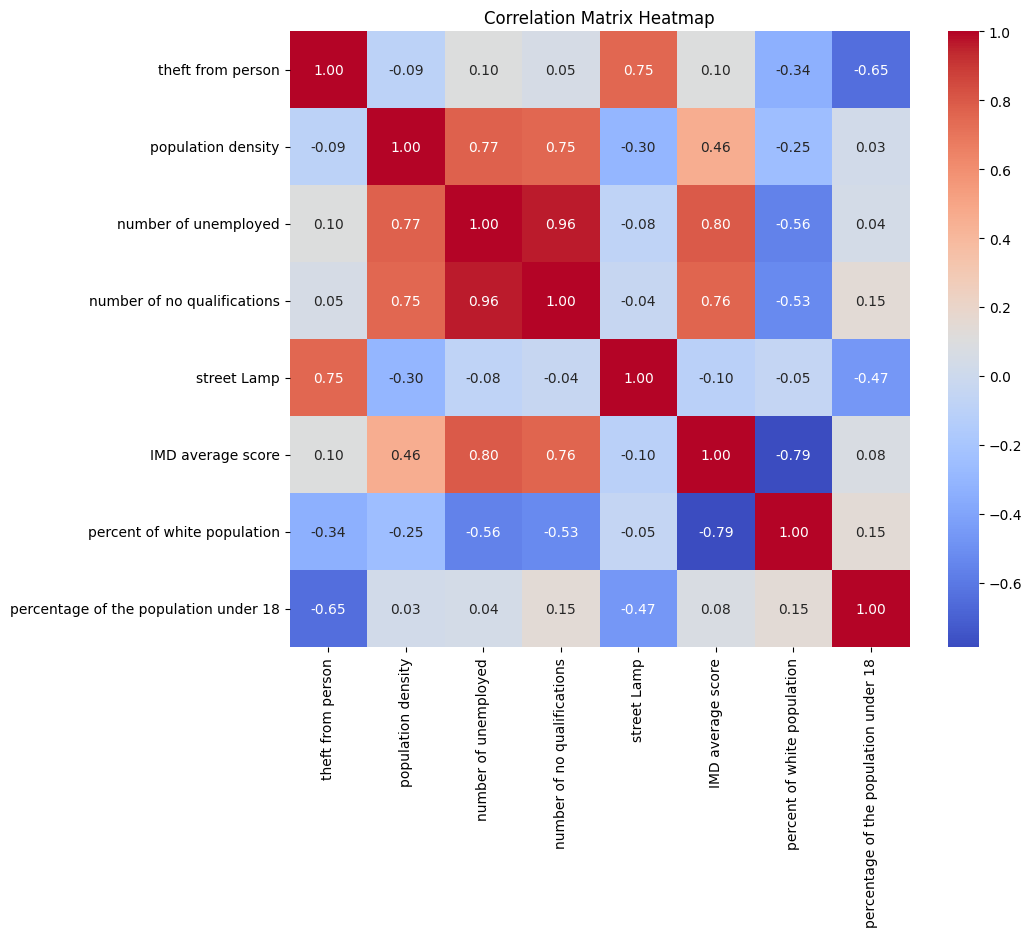

In [73]:
data=pd.read_csv('https://raw.githubusercontent.com/Succzzz33/QM_2023/main/finalver.csv')
data_cleaned = data.drop(['id', 'ward'], axis=1)

# Convert columns with numbers stored as strings to numeric values
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        data_cleaned[col] = data_cleaned[col].str.replace(',', '').astype(float)
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

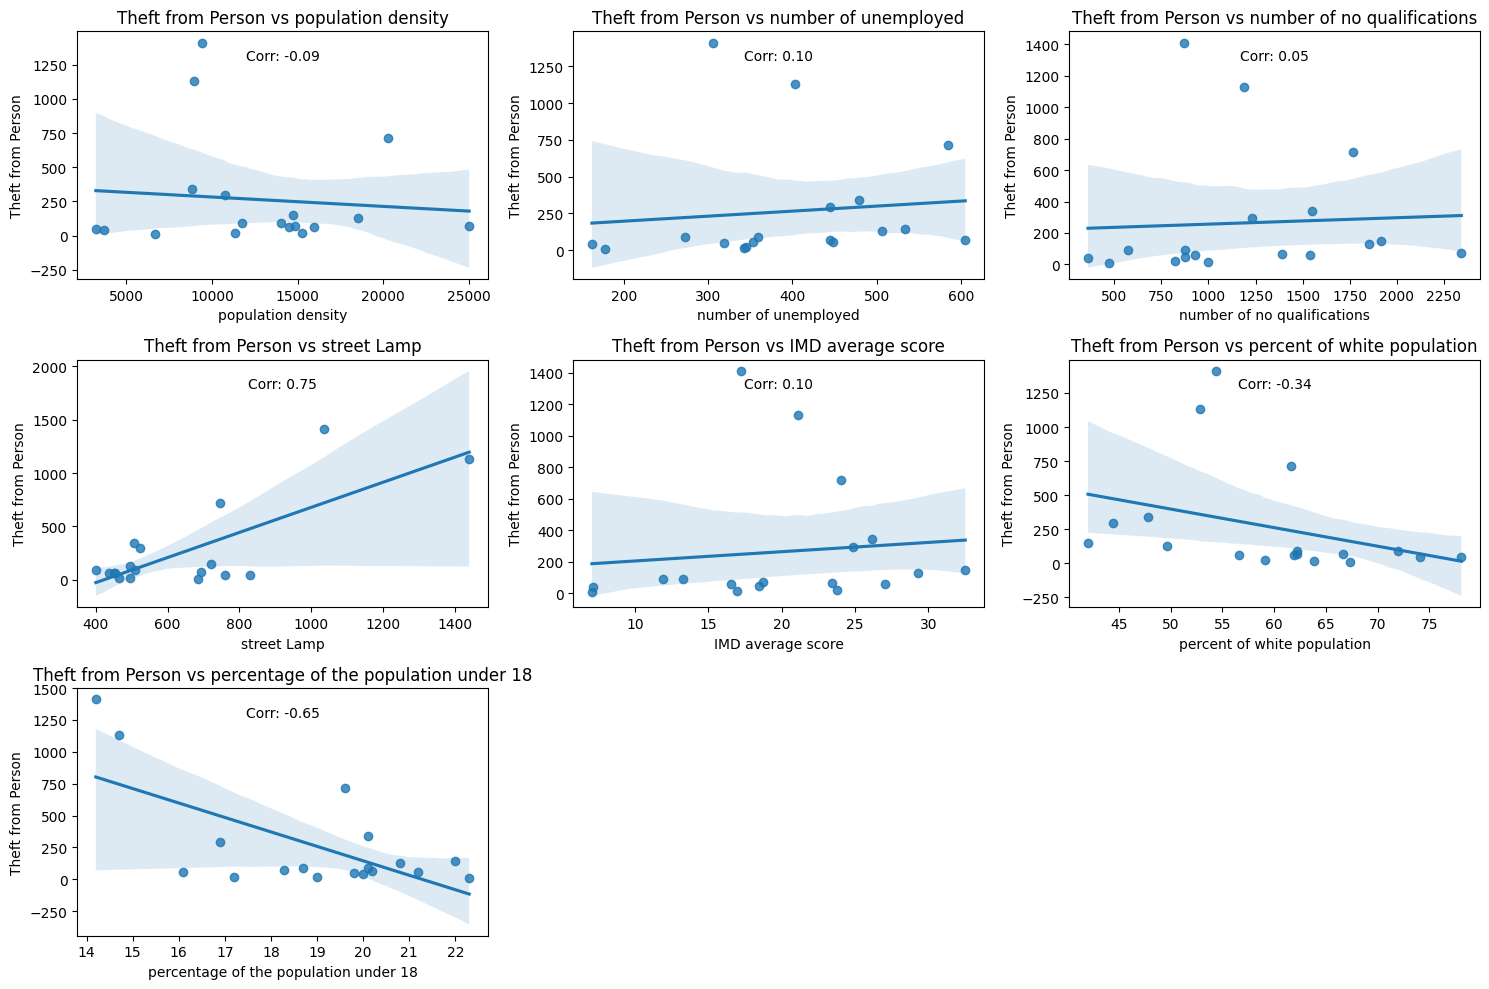

In [74]:
columns_to_plot = data_cleaned.columns.drop('theft from person')

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plotting each variable against 'theft from person'
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sn.regplot(x=data_cleaned[column], y=data_cleaned['theft from person'])
    plt.title(f'Theft from Person vs {column}')
    plt.xlabel(column)
    plt.ylabel('Theft from Person')

    # Display correlation coefficient
    correlation_coef = data_cleaned['theft from person'].corr(data_cleaned[column])
    plt.text(0.5, 0.9, f'Corr: {correlation_coef:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()



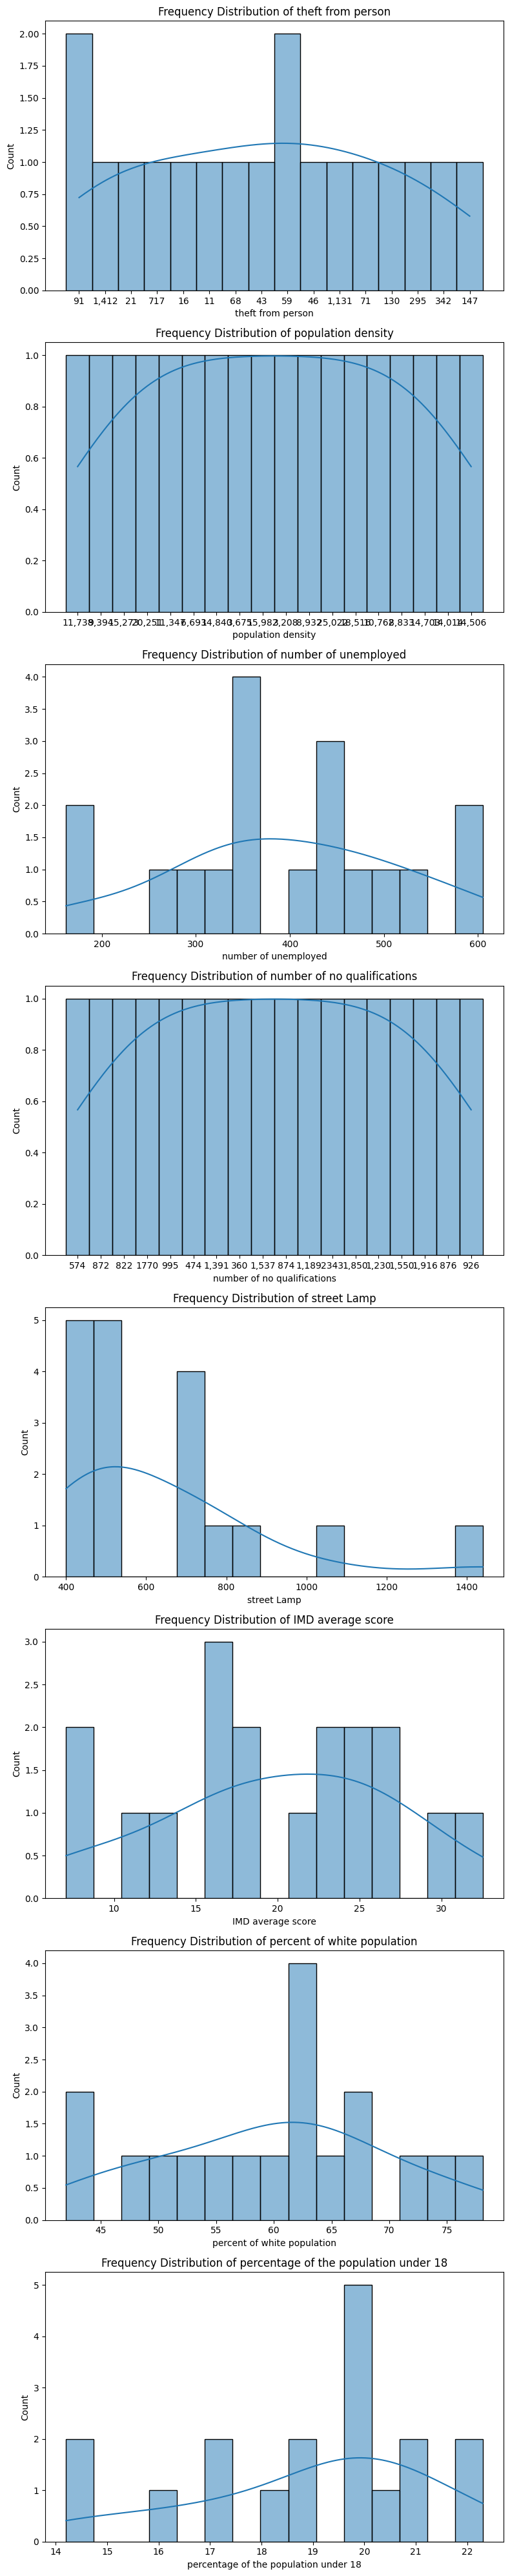

In [77]:
numeric_variables = data_cleaned.select_dtypes(include=['int64', 'float64'])
n_vars = numeric_variables.shape[1]

fig, axs = plt.subplots(n_vars, figsize=(8, 5 * n_vars))

for i, var in enumerate(numeric_variables):
    # Histogram
    sn.histplot(data[var], bins=15, kde=True, ax=axs[i])
    axs[i].set_title(f'Frequency Distribution of {var}')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

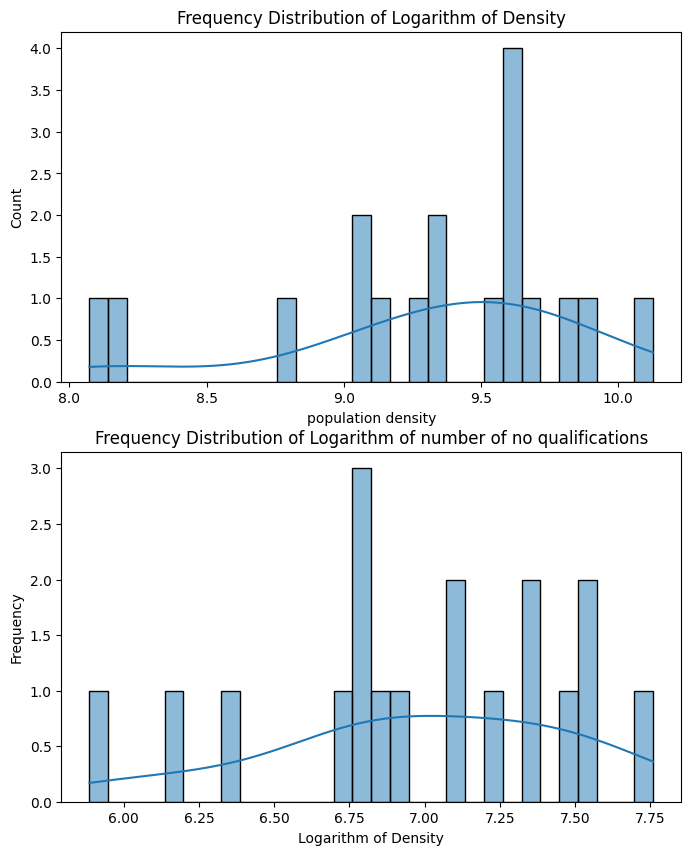

In [78]:
data_den_log=np.log(data_cleaned['population density'])
data_unauthorized_log=np.log(data_cleaned['number of no qualifications'])
fig, axs = plt.subplots(2,figsize=(8, 10))
sn.histplot(data_den_log, kde=True, bins=30,ax=axs[0])
sn.histplot(data_unauthorized_log, kde=True, bins=30)
axs[0].set_title('Frequency Distribution of Logarithm of Density')
axs[1].set_title('Frequency Distribution of Logarithm of number of no qualifications')
plt.xlabel('Logarithm of Density')
plt.ylabel('Frequency')

In [79]:


# Preparing the data for linear regression again
X = data_cleaned.drop('theft from person', axis=1)  # independent variables
y = data_cleaned['theft from person']  # dependent variable

# Building the linear regression model again
model = LinearRegression()
model.fit(X, y)

# Using statsmodels to get a detailed summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm)
results = model_sm.fit()

# Getting the summary of the model
summary = results.summary()
summary


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      theft from person   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     4.683
Date:                Thu, 07 Dec 2023   Prob (F-statistic):             0.0143
Time:                        17:37:47   Log-Likelihood:                -120.10
No. Observations:                  18   AIC:                             256.2
Df Residuals:                      10   BIC:                             263.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   939.9926   1228.294      0.765      0.462   -1796.817    3676.802
population density                        0.0050      0.023      0.220      0.831      -0.046       0.056
number of unemployed                      2.0509      2.443      0.839      0.421      -3.393       7.494
number of no qualifications              -0.4602      0.532     -0.864      0.408      -1.646       0.726
street Lamp                               1.0392      0.348      2.987      0.014       0.264       1.814
IMD average score                        -7.6773     21.429     -0.358      0.728     -55.424      40.069
percent of white population             -13.3056     11.005     -1.209      0.254     -37.825      11.214
percentage of the population under 18   -37.9531     39.544     -0.960      0.360    -126.063      50.157
==============================================================================
Omnibus:                        5.651   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                3.402
Skew:                           1.028   Prob(JB):                        0.182
Kurtosis:                       3.557   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i)
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


In [81]:
df_predictors_selected_VIF = drop_column_using_vif_(data_cleaned.drop('theft from person', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)
model_sm_afterVIF = sm.OLS(y, exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_sm_afterVIF.summary()
#解释In the model below, even if we have tackled the multicollinearity between variables, there is still a warning about the large condition number. 可能是因为Different scales of variables。

Dropping: number of unemployed
Dropping: number of no qualifications
The columns remaining after VIF selection are:
Index(['population density', 'street Lamp', 'IMD average score',
       'percent of white population', 'percentage of the population under 18'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      theft from person   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     7.112
Date:                Thu, 07 Dec 2023   Prob (F-statistic):            0.00263
Time:                        17:37:47   Log-Likelihood:                -120.79
No. Observations:                  18   AIC:                             253.6
Df Residuals:                      12   BIC:                             258.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1490.9738    962.628      1.549      0.147    -606.412    3588.360
population density                        0.0035      0.013      0.276      0.788      -0.025       0.032
street Lamp                               0.9279      0.271      3.426      0.005       0.338       1.518
IMD average score                        -3.8485     15.698     -0.245      0.810     -38.052      30.355
percent of white population             -12.1442     10.362     -1.172      0.264     -34.722      10.433
percentage of the population under 18   -56.4050     30.524     -1.848      0.089    -122.911      10.101
==============================================================================
Omnibus:                        4.186   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.847
Skew:                           0.974   Prob(JB):                        0.241
Kurtosis:                       2.964   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

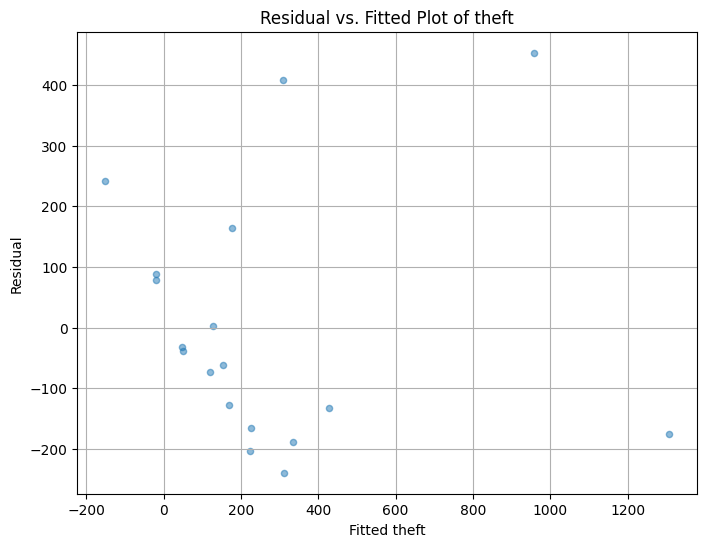

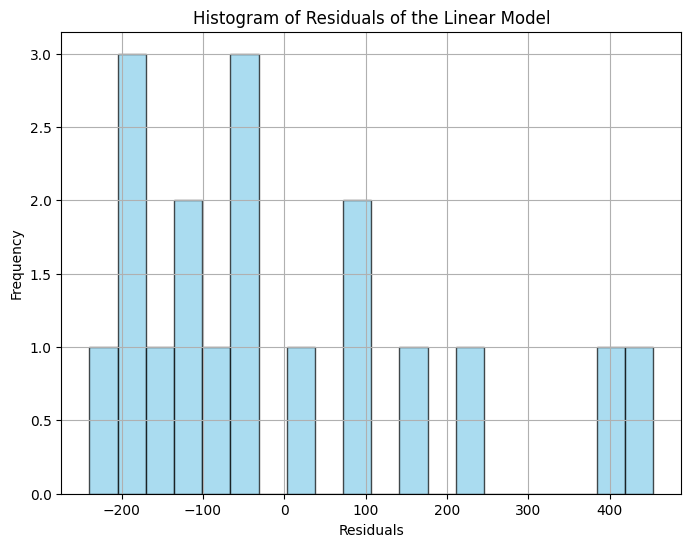

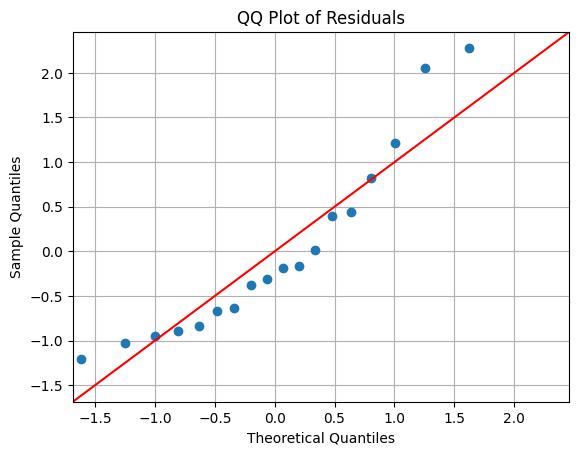

In [82]:
#残差分析
plt.figure(figsize=(8, 6))
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2)
plt.scatter(model_sm_afterVIF.fittedvalues, model_sm_afterVIF.resid, alpha = 0.5, s=20)
plt.xlabel('Fitted theft')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of theft')
# Adding grid lines
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))

# Plotting the histogram
plt.hist(model_sm_afterVIF.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

fig = sm.qqplot(model_sm_afterVIF.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

plt.grid(True)

plt.show()

In [83]:
#测试linear H0：residuals are homoskedastic (the null hypothesis)即 线性无关
test_rainbow = statsmodels.stats.diagnostic.linear_rainbow(model_sm_afterVIF)
print("The p value of the rainbow test: {:.4f}".format(test_rainbow[1]))
#this dataset and model does not meet the linear relationship condition.

The p value of the rainbow test: 0.0357


In [84]:
#测试 independent error
#The 0 正相关 4 负相关 2无关

test_dw = statsmodels.stats.stattools.durbin_watson(model_sm_afterVIF.resid)
print("Durbin-Watson test statistic is: {:.4f}".format(test_dw))

Durbin-Watson test statistic is: 2.1185


In [85]:
#测试 Normally distributed errors
#The null hypothesis 正态分布
test_JB = statsmodels.stats.stattools.jarque_bera(model_sm_afterVIF.resid)
print("The p value of the Jarque Bera test: {:.4f}".format(test_JB[1]))

The p value of the Jarque Bera test: 0.2409


In [86]:
#异方差
#null 相同方差
statsmodels.stats.diagnostic.het_goldfeldquandt(model_sm_afterVIF.model.endog, model_sm_afterVIF.model.exog)#中间值是pvalue 不能拒绝null，所以有equal variance

(0.35930696170852244, 0.7885495261446777, 'increasing')

In [87]:
# hypo 人口密度分两类 人口密度高的区域与人口密度低的区域）的盗窃数案件是否存在显著差异。
from scipy.stats import ttest_ind

population_density_median = data_cleaned['population density'].median()

# Splitting the data into two groups based on population density
high_density_group = data_cleaned[data_cleaned['population density'] >= population_density_median]
low_density_group = data_cleaned[data_cleaned['population density'] < population_density_median]

# Calculating the mean theft from person for each group
mean_theft_high_density = high_density_group['theft from person'].mean()
mean_theft_low_density = low_density_group['theft from person'].mean()

# Conducting an independent samples t-test
t_stat, p_value = ttest_ind(high_density_group['theft from person'], low_density_group['theft from person'])

t_stat, p_value

(-1.1865500081775953, 0.25272555860311796)